## Project 'Price Prediction'  Part II.
#### Выполнен Герасимовой Екатериной( kaygerasimova@gmail.com)

In [2]:
#🥦основные:

import numpy as np
import pandas as pd
import pickle
import random

#🥦визуализация:


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.image as img

#🥦разделение датасета:

from sklearn.model_selection import train_test_split,cross_val_score


#🥦модели:


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV

#🥦метрики:
from sklearn.metrics import r2_score as r2


#🥦дополнительно:
from pylab import rcParams
from __future__ import division, print_function
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)
from scipy import stats
from scipy.stats import mode
import warnings 
warnings.filterwarnings('ignore')

In [3]:
TRAIN_DATASET_PATH = 'Documents/trainPROJECT.csv'
TEST_DATASET_PATH = 'Documents/test (1).csv'
REPORTS_FILE_PATH = 'Documents/reports/'
MODEL_FILE_PATH = 'Documents/models/model.pkl'

## RandomForest TRAIN

In [4]:
data_train = pd.read_csv("data_train.csv", sep=";")
data_train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Price,med_house_year,age_binary_cat,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
0,11809,27,3.0,52.969044,32.781260,10.0,4,10.0,2014,0.075424,...,0,305018.88,8,0,0,1,0,1,0,1
1,3013,22,1.0,40.781260,32.781260,8.0,7,8.0,1966,0.118537,...,0,177734.55,56,0,0,1,0,1,0,1
2,8215,1,3.0,78.342220,47.671970,10.0,2,17.0,1988,0.025609,...,1,282078.72,34,0,0,1,0,1,0,1
3,2352,1,1.0,40.409910,32.781260,1.0,10,22.0,1977,0.007122,...,1,168106.00,45,0,0,1,0,1,0,1
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,...,6,343995.10,50,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090730,33.272625,6.0,3,12.0,1981,0.300323,...,9,119367.45,41,0,0,1,0,1,0,1
9996,16265,27,2.0,64.307686,37.038420,9.0,13,13.0,1977,0.072158,...,0,199715.16,45,0,1,0,0,1,0,1
9997,2795,178,1.0,37.781260,32.781260,5.0,3,5.0,1958,0.460556,...,5,165953.90,64,0,0,1,0,1,0,1
9998,14561,21,1.0,37.781260,32.781260,5.0,3,9.0,1969,0.194489,...,5,171842.40,53,0,0,1,0,1,0,1


In [5]:
feature_names = ["Rooms","Square","Social_1","Social_2", "Social_3","KitchenSquare","DistrictId", "Ecology_1","LifeSquare", "HouseYear",
    "HouseFloor","Floor", "Healthcare_1", "med_house_year","Shops_1","Helthcare_2"]

target_name = 'Price'

In [6]:
X = data_train[feature_names]
y = data_train[target_name]

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=42)

In [8]:
rf = RandomForestRegressor(max_depth=7, max_features=20, n_estimators=1000)
rf.fit(X_train,  y_train)

RandomForestRegressor(max_depth=7, max_features=20, n_estimators=1000)

In [9]:
def evaluate_preds(train_true_values, train_pred_values, valid_true_values, valid_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(valid_true_values, valid_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=valid_pred_values, y=valid_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Valid sample prediction')

    plt.show()

Train R2:	0.752
Valid R2:	0.662


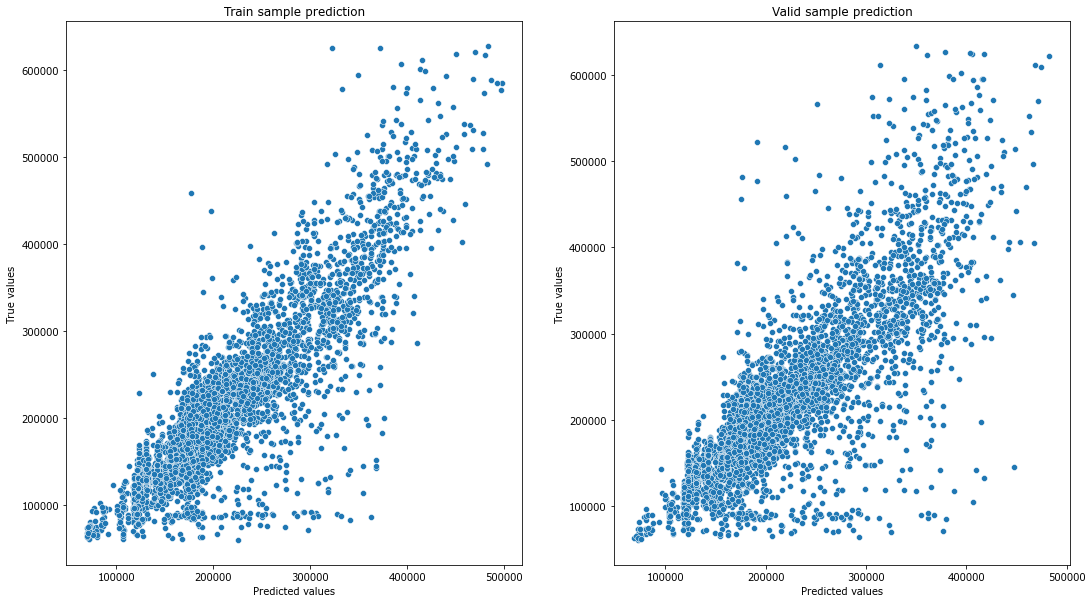

In [10]:
y_train_preds = rf.predict(X_train)
y_valid_preds = rf.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

In [11]:
y_train_preds

array([435924.19093232, 212948.2560758 , 260647.82894128, ...,
       172645.68519829, 131091.51457136, 175177.86196197])

In [12]:
y_valid_preds

array([281123.14920655, 253570.17738552, 215351.98483035, ...,
       141868.66062594, 175891.11755928, 188604.79050566])

In [13]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_valid_preds)

0.6621321514296233

In [14]:
cv_score = cross_val_score(rf, X, y, scoring='r2', cv = KFold(n_splits=5, shuffle=True, random_state=42))
cv_score

array([0.7041988 , 0.64485972, 0.66353729, 0.67073576, 0.67107979])

In [15]:
cv_score.mean()

0.6708822706088178

In [16]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)


,feature_name,importance
0,Rooms,0.299173
1,Square,0.212350
2,Social_1,0.121120
3,Social_2,0.090136
5,KitchenSquare,0.066561
4,Social_3,0.047951
6,DistrictId,0.042312
7,Ecology_1,0.025177
12,Healthcare_1,0.024801
8,LifeSquare,0.018423


In [17]:
feature_importances.to_csv(REPORTS_FILE_PATH + 'feature_importances.cvs',index=False)

In [18]:
with open(MODEL_FILE_PATH, "wb") as file:
    pickle.dump(rf, file)


In [19]:
with open(MODEL_FILE_PATH, "rb") as file:
    g_model = pickle.load(file)
    
g_model

RandomForestRegressor(max_depth=7, max_features=20, n_estimators=1000)

## RandomForest TEST

In [29]:
test_df = pd.read_csv("test.csv", sep=";")
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,med_house_year,age_binary_cat
0,4567,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,...,1,1,0,1,0,1,0,1,52,0
1,5925,62,1.0,52.568134,42.568134,10.0,7,17.0,2017,0.072158,...,0,0,1,0,0,1,0,1,5,1
2,960,27,2.0,59.463676,10.000000,9.0,19,19.0,1977,0.211401,...,0,1,0,1,0,1,0,1,45,0
3,3848,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,...,0,0,0,1,0,1,0,1,57,0
4,746,74,1.0,53.837055,10.000000,1.0,8,17.0,1977,0.309479,...,0,6,0,1,0,1,0,1,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177520,30.339945,5.0,1,5.0,1962,0.069660,...,1,2,0,1,0,1,0,1,60,0
4996,16138,38,3.0,93.698120,29.118840,10.0,21,27.0,2018,0.060753,...,0,7,0,1,0,1,0,1,4,1
4997,3912,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,...,2,5,0,1,0,1,0,1,56,0
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,...,0,11,0,1,0,1,0,1,52,0


In [30]:
feature_names = ["Rooms","Square","Social_1","Social_2", "Social_3","KitchenSquare","DistrictId", "Ecology_1","LifeSquare", "HouseYear",
    "HouseFloor","Floor", "Healthcare_1", "med_house_year","Shops_1","Helthcare_2"]

target_name = 'Price'

In [31]:
X = test_df[feature_names]


In [32]:
y_test_preds = g_model.predict(X)

In [33]:
y_test_preds 


array([165063.49454888, 126561.57264545, 156762.88214019, ...,
       162916.9622624 , 175566.87009729, 244059.57041747])

In [35]:
TEST = pd.DataFrame(y_test_preds, columns = ["Price"])
TEST.set_index(test_df["Id"], inplace=True)
TEST.head()

,Price
Id,
4567,165063.494549
5925,126561.572645
960,156762.882140
3848,234785.422881
746,227640.890355


In [36]:
TEST.to_csv("Price_TEST.csv", sep=";", index=False)